<a href="https://colab.research.google.com/github/brunobro/selection-of-forage-grasses-for-cultivation-under-water-limited-conditions/blob/main/SelectionForageGrassCultivars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Selection of forage grasses for cultivation under water limited conditions using Manhattan distance and TOPSIS**

Employ method proposed in https://www.mdpi.com/2223-7747/11/21/2827/htm

**Authors:** Bruno Rodrigues de Oliveira (1)*, Marco Aparecido Queiroz Duarte (2), Alan Mario Zuffo (3), Fábio Steiner (4), Jorge González Aguilera (1,4) Alexson Filgueiras Dutra (5), Francisco de Alcântara Neto (6), Marcos Renan Lima Leite (6), Nágila Sabrina Guedes da Silva (6), Eliseo Pumacallahui Salcedo (7), Luis Morales-Aranibar (7), Richar Marlon Mollinedo Chura (8), Roger Ccama Alejo (8), Wilberth Caviedes Contreras (9)

1 Pantanal Editora, Rua Abaete, 83, Sala B, Centro. Nova Xavantina-MT, Brasil.

2 Departamento de Matemática, Universidade Estadual de Mato Grosso do Sul (UEMS), Unidade de Cassilândia, Rodovia MS 306 - km 6,4, Cassilândia-MS, Brasil.

3 Departamento de Agronomia, Universidade Estadual do Maranhão (UEMA), Praça Gonçalves Dias, Balsas-MA, Brasil.

4 Departamento de Agronomia, Universidade Estadual de Mato Grosso do Sul (UEMS), Unidade de Cassilândia, Rodovia MS 306 - km 6,4, Cassilândia-MS, Brasil.
5 Instituto Federal do Piauí, Uruçuí, Piauí, Brasil.

6 Programa de Pós-Graduação em Agronomia, Universidade Federal do Piauí Teresina, Piauí, Brasil.

7 Departamento de Ingeniería Civil y Ciencias Básicas, Universidad Nacional Intercultural de Quillabamba (UNIQ), Cusco 08741, Perú.

8 Departamento Académico de Ciencias Físico Matemáticas, Universidad Nacional del Altiplano - Puno, Puno 21001, Perú.

9 Departamento Académico de Ciencias Básicas, Universidad Nacional Amazónica de Madre de Dios (UNAMAD), Madre de Dios 17001, Perú.


**Corresponding author:** bruno@editorapantanal.com.br

Pantanal Editora, Rua Abaete, 83, Sala B, Centro. Nova Xavantina-MT, Brasil.


**Abstract**
Extreme weather events, such as severe droughts, pose a threat to the sustainability of beef cattle by limiting the growth and development of forage plants and reducing the available pasture for animals. Thus, the search for forage species that are more tolerant and adapted to soil water deficit conditions is an important strategy to improve the food supply. In this study, we propose utilizing the mathematical concept of Manhattan distance to assess the variations in morphological variables of tropical forage grasses under water-limited conditions. This study aimed to select genotypes of tropical forage grasses under different water stress levels (moderate or severe) at this distance and the Technique for Order Preference by Similarity to Ideal Solution (TOPSIS). Nine varieties from five species were examined. Forage grasses were grown in 12-L pots under three soil irrigation regimes [100% of pot capacity – PC (well-irrigated control), 60% of PC (moderate drought stress), and 25% of PC (severe drought stress)] with four replicates. Drought stress treatments were applied for 25 days during the forage grass tillering and stalk elongation phases. After exposure to drought stress, the growth and morphological traits of forage plants were evaluated. The results show that the use of the Manhattan distance combined with TOPSIS helps in the genotypic selection of more stable tropical forage grass varieties when comparing plants exposed to moderate and severe drought conditions in relation to the nonstressful environment (control). The ‘ADR 300’, ‘Pojuca’, ‘Marandu’, and ‘Xaraés’ varieties show greater adaptation and stability when grown in a greenhouse and subjected to water stress environments. Therefore, these selected varieties must be tested under field conditions to confirm their best performance in forage production under water stress conditions. The selected forage varieties can be used as parents in plant breeding programs, allowing us to obtain new drought-resistant genotypes.








In [1]:
import numpy as np
import pandas as pd

from IPython.display import display
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from scipy.spatial import distance

In [2]:
#Library Python-Docx
#Documentation: https://python-docx.readthedocs.io/en/latest/
!pip install python-docx

import docx
from docx.shared import Pt
from docx.enum.table import WD_TABLE_ALIGNMENT, WD_ALIGN_VERTICAL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=7194e2b70f04675b5efeaeeb508faec994746c4a1fb793fe507383cf95323d92
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [3]:
#Function to convert table for MS Word
def convert_MSWord(df, name_doc, n_dig=4):

    doc = docx.Document()

    n_rows = df.shape[0]
    n_cols = df.shape[1]
    table = doc.add_table(rows=n_rows + 1, cols=n_cols)
    for col_ins, col_label in enumerate(df):
        for row_ins in np.arange(-1, n_rows, 1):
            cell_ = table.cell(row_ins + 1, col_ins)
            if row_ins == -1:
                cell_.text = df.columns[col_ins]
            else:
                v = df[col_label][row_ins]
                if isinstance(v, float) or isinstance(v, int):
                    v = np.around(v, n_dig)

                cell_.text = str(v)

    #Store
    doc.save(name_doc + '.docx')

In [4]:
#Variables
Vars = ['PH', 'NT', 'NGL', 'RV','LA','SDM', 'RDM', 'TDM']

#Normalizes each variable
def norm(df):
    df = df.copy() #Avoid overriding the original dataframe
    for col in Vars:
        df[col] = df[col] / df[col].max()
    return df

#Read data
df = pd.read_excel('data.xlsx')
del df['Repetition'] #Not used

#Varieties
cultivars = np.unique(df['Variety'])

#Split by class
df_control_  = df[df['Class'] == 'Control']
df_moderate_ = df[df['Class'] == 'Moderate']
df_severe_   = df[df['Class'] == 'Severe']

#Calculate the average value of experiments
df_control_  = df_control_.groupby(['Variety'], as_index=False).mean(numeric_only=True)
df_moderate_ = df_moderate_.groupby(['Variety'], as_index=False).mean(numeric_only=True)
df_severe_   = df_severe_.groupby(['Variety'], as_index=False).mean(numeric_only=True)

#Convert to MS Word - Raw data
convert_MSWord(df_control_, 'raw_control')
convert_MSWord(df_moderate_, 'raw_moderate')
convert_MSWord(df_severe_, 'raw_severe')

'''
Normalize
'''
control_norm  = norm(df_control_[Vars])
moderate_norm = norm(df_moderate_[Vars])
severe_norm   = norm(df_severe_[Vars])

df_control  = df_control_.copy()
df_moderate = df_moderate_.copy()
df_severe   = df_severe_.copy()

df_control.iloc[:,1:]  = control_norm
df_moderate.iloc[:,1:] = moderate_norm
df_severe.iloc[:,1:]   = severe_norm

#Show an example
display(df_moderate)

#Convert to MS Word - Normalized data
convert_MSWord(df_control, 'norm_control')
convert_MSWord(df_moderate, 'norm_moderate')
convert_MSWord(df_severe, 'norm_severe')

,Variety,PH,NT,NGL,RV,LA,SDM,RDM,TDM
0,ADR 300,1.000000,0.134875,0.223387,0.372549,0.066130,0.639747,0.345557,0.551880
1,Aruana,0.569900,0.730250,0.500269,1.000000,0.803342,0.816141,0.551678,0.740339
2,BRS Piatã,0.511037,0.354528,0.350364,0.758170,0.481518,0.666678,0.999261,0.784382
3,Comum,0.379933,1.000000,0.928231,1.000000,0.894344,1.000000,0.959633,1.000000
4,Marandu,0.412040,0.450867,0.333904,0.726797,0.829962,0.724282,0.833432,0.769592
5,Mombaça,0.503010,0.527938,0.320971,0.836601,0.886368,0.920389,0.870989,0.916379
6,Pojuca,0.420067,0.631874,1.000000,0.259944,0.258337,0.455052,0.242737,0.391551
7,Tanzânia,0.511037,0.639692,0.339783,0.980392,1.000000,0.895434,1.000000,0.941505
8,Xaraés,0.449498,0.412331,0.272767,0.692810,0.700510,0.642677,0.813101,0.706970


# Manhattan Distance

This approach will compare the distances of the control samples for those stressed.

In [5]:
def dist(x, y):
    return distance.cityblock(x, y)

#Store distance
distances = []

for cultivar in cultivars:

    sel1_control = np.array(df_control[df_control['Variety'] == cultivar])[0][1:]
    sel1_moderate  = np.array(df_moderate[df_moderate['Variety'] == cultivar])[0][1:]
    sel1_severe = np.array(df_severe[df_severe['Variety'] == cultivar])[0][1:]

    dcm = dist(sel1_control, sel1_moderate)
    dcs = dist(sel1_control, sel1_severe)

    distances.append([dcm, dcs])

    #print('Control/Saline: %.4f' %dcs)
    #print('Control/Drought: %.4f' %dcd)
    #print('\n')

distances = np.array(distances)

df_dist = pd.DataFrame(data=np.array([cultivars, distances[:,0], distances[:,1]]).T, columns=['Variety', 'Control/Moderate','Control/Severe'])
display(df_dist)
#df_dist.to_excel("matrix.xlsx")

,Variety,Control/Moderate,Control/Severe
0,ADR 300,0.468357,0.500819
1,Aruana,1.030553,1.17527
2,BRS Piatã,0.894178,0.961599
3,Comum,1.0484,1.126117
4,Marandu,0.674732,0.803607
5,Mombaça,0.700514,1.064065
6,Pojuca,0.745571,0.548418
7,Tanzânia,1.089822,1.47804
8,Xaraés,0.803241,0.803843


#TOPSIS

Apply TOPSIS method using the obtained distances as evaluation matrix

In [6]:
!pip install topsis-jamesfallon

In [7]:
from topsis import topsis

decision = topsis(distances, [0.5, 0.5], [0, 0])
decision.calc()

print('Best variety: ', cultivars[decision.optimum_choice])

Best variety:  ADR 300


In [8]:
#Data with distances and similarities obtained by TOPSIS
data = np.array([cultivars, distances[:,0], distances[:,1], decision.C]).T

df_all = pd.DataFrame(data=data, columns=['Variety','Control/Moderate','Control/Severe','TOPSIS Score'])

display(df_all)
convert_MSWord(df_all.sort_values(by='TOPSIS Score', ascending=False), 'resultado_topsis')

,Variety,Control/Moderate,Control/Severe,TOPSIS Score
0,ADR 300,0.468357,0.500819,1.0
1,Aruana,1.030553,1.17527,0.248797
2,BRS Piatã,0.894178,0.961599,0.455236
3,Comum,1.0484,1.126117,0.279046
4,Marandu,0.674732,0.803607,0.682243
5,Mombaça,0.700514,1.064065,0.495114
6,Pojuca,0.745571,0.548418,0.757111
7,Tanzânia,1.089822,1.47804,0.0
8,Xaraés,0.803241,0.803843,0.604265


In [9]:
#To generate a graph with the values
K = len(cultivars)
data1 = np.array([cultivars, distances[:,0], K*['Control/Moderate']]).T
data2 = np.array([cultivars, distances[:,1], K*['Control/Severe']]).T
data3 = np.array([cultivars, decision.C    , K*['TOPSIS score']]).T

df1 = pd.DataFrame(data=data1, columns=['Variety','Measure','Value'])
df2 = pd.DataFrame(data=data2, columns=['Variety','Measure','Value'])
df3 = pd.DataFrame(data=data3, columns=['Variety','Measure','Value'])

df = pd.concat([df1, df2, df3])

#display(df)

Text(0.5, 0, 'Distance or score')

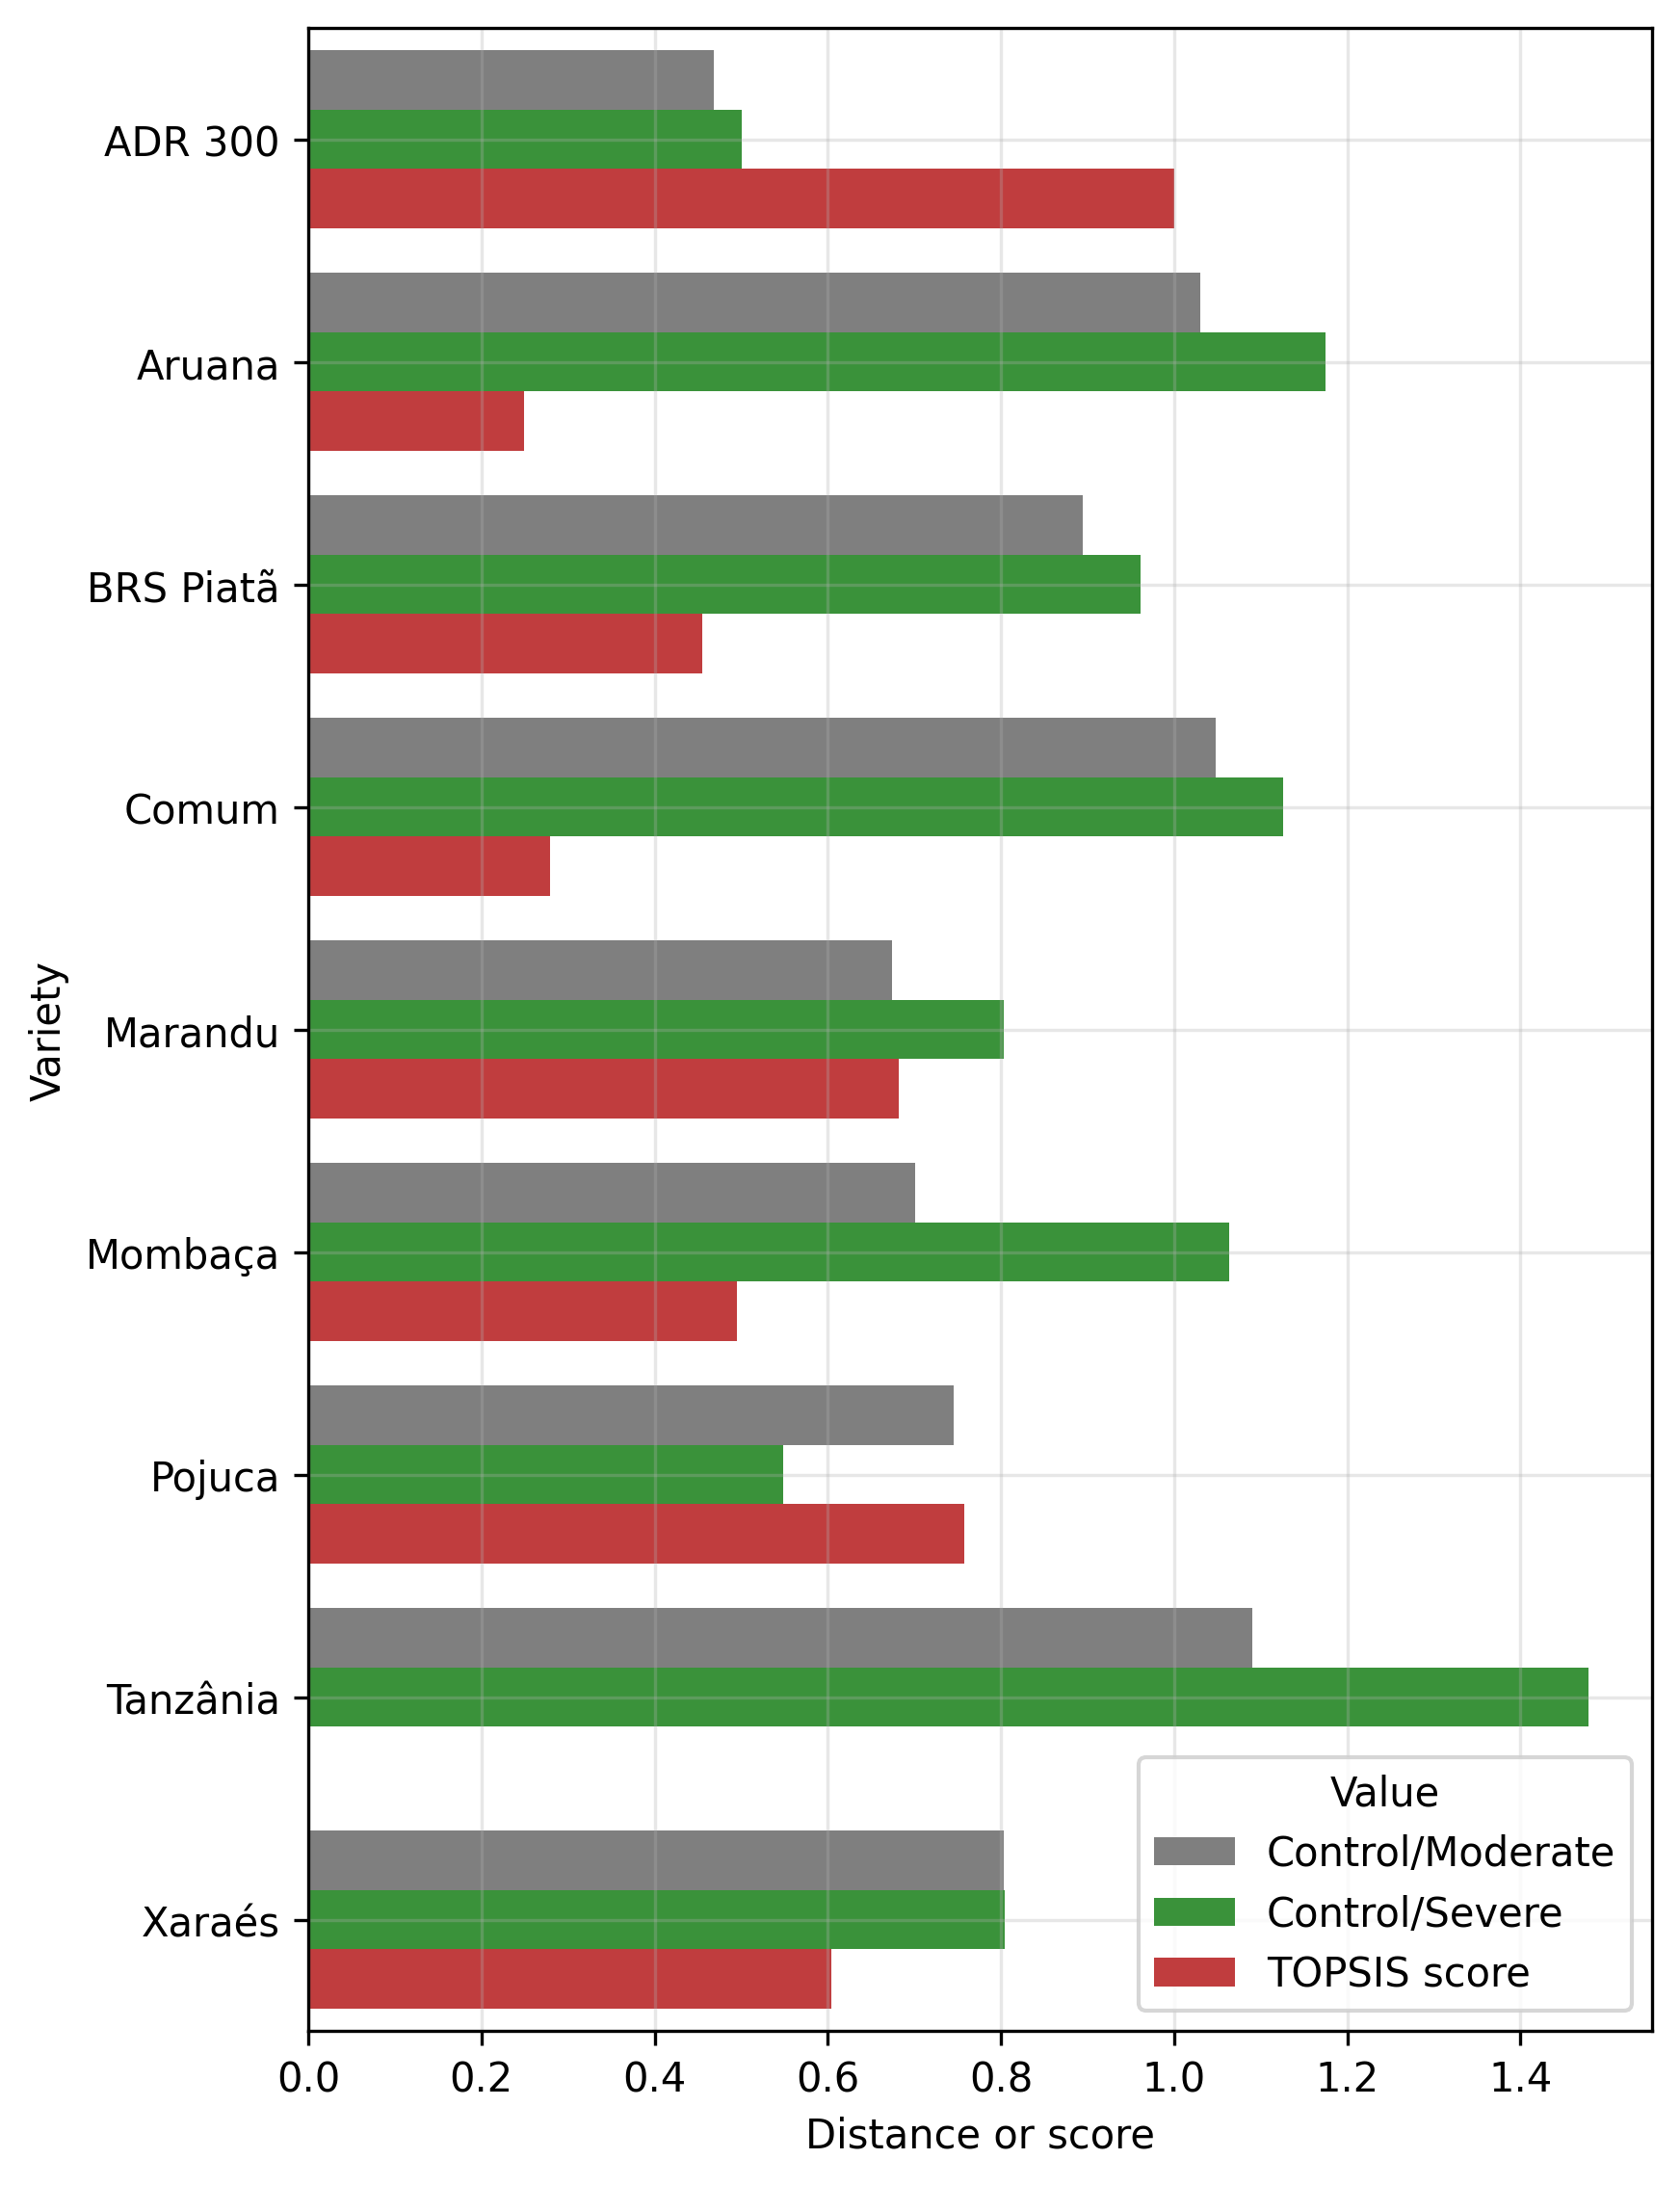

In [10]:
#Bar chart with all values
plt.figure(dpi=300, figsize=(6,9))
sns.barplot(x='Measure', y='Variety', hue='Value', data=df, palette = ['tab:gray', 'tab:green', 'tab:red'])
plt.grid(alpha=0.3)
plt.ylabel('Variety')
plt.xlabel('Distance or score')

In [11]:
#Varies the weights of the criteria (distances in each stressed environment)
#and check how topsis score changes to the 10 best cultivars

for w_s in np.arange(0.1, 1, 0.2):
    # w_s is the weight for control/saline
    w_d = 1 - w_s #weight for control/drought

    #Apply TOPSIS with new weights
    decision = topsis(distances, [w_s, w_d], [0, 0])
    decision.calc()

    #Data with distances and similarities obtained by TOPSIS
    data = np.array([cultivars, decision.C]).T

    df_ = pd.DataFrame(data=data, columns=['Variety','TOPSIS Score'])

    print('Weight Control/Moderate: ', w_s)
    print(df_.sort_values(by=['TOPSIS Score'], ascending=False).head(10).to_string(index=False))
    convert_MSWord(df_.sort_values(by=['TOPSIS Score'], ascending=False).head(10), 'resultado_weight_' + str(w_s))


Weight Control/Moderate:  0.1
  Variety TOPSIS Score
  ADR 300          1.0
   Pojuca     0.939931
  Marandu     0.690004
   Xaraés     0.688088
BRS Piatã     0.527026
  Mombaça     0.425057
    Comum     0.358525
   Aruana     0.308674
 Tanzânia          0.0
Weight Control/Moderate:  0.30000000000000004
  Variety TOPSIS Score
  ADR 300          1.0
   Pojuca     0.866546
  Marandu     0.688105
   Xaraés     0.665968
BRS Piatã     0.508992
  Mombaça      0.44278
    Comum     0.338675
   Aruana     0.294173
 Tanzânia          0.0
Weight Control/Moderate:  0.5000000000000001
  Variety TOPSIS Score
  ADR 300          1.0
   Pojuca     0.757111
  Marandu     0.682243
   Xaraés     0.604265
  Mombaça     0.495114
BRS Piatã     0.455236
    Comum     0.279046
   Aruana     0.248797
 Tanzânia          0.0
Weight Control/Moderate:  0.7000000000000001
  Variety TOPSIS Score
  ADR 300          1.0
  Marandu     0.673474
   Pojuca      0.63666
  Mombaça     0.572805
   Xaraés       0.5183
BRS Pi

-------------------------------------------------------------------------------------------------------

Variety:  ADR 300


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
0,19.154229,23.913043,19.491525,40.625,15.224672,27.972500,3.429752,24.013465,Control/Moderate
0,44.029851,30.434783,41.525424,56.250,18.962306,49.391989,33.884298,46.890415,Control/Severe


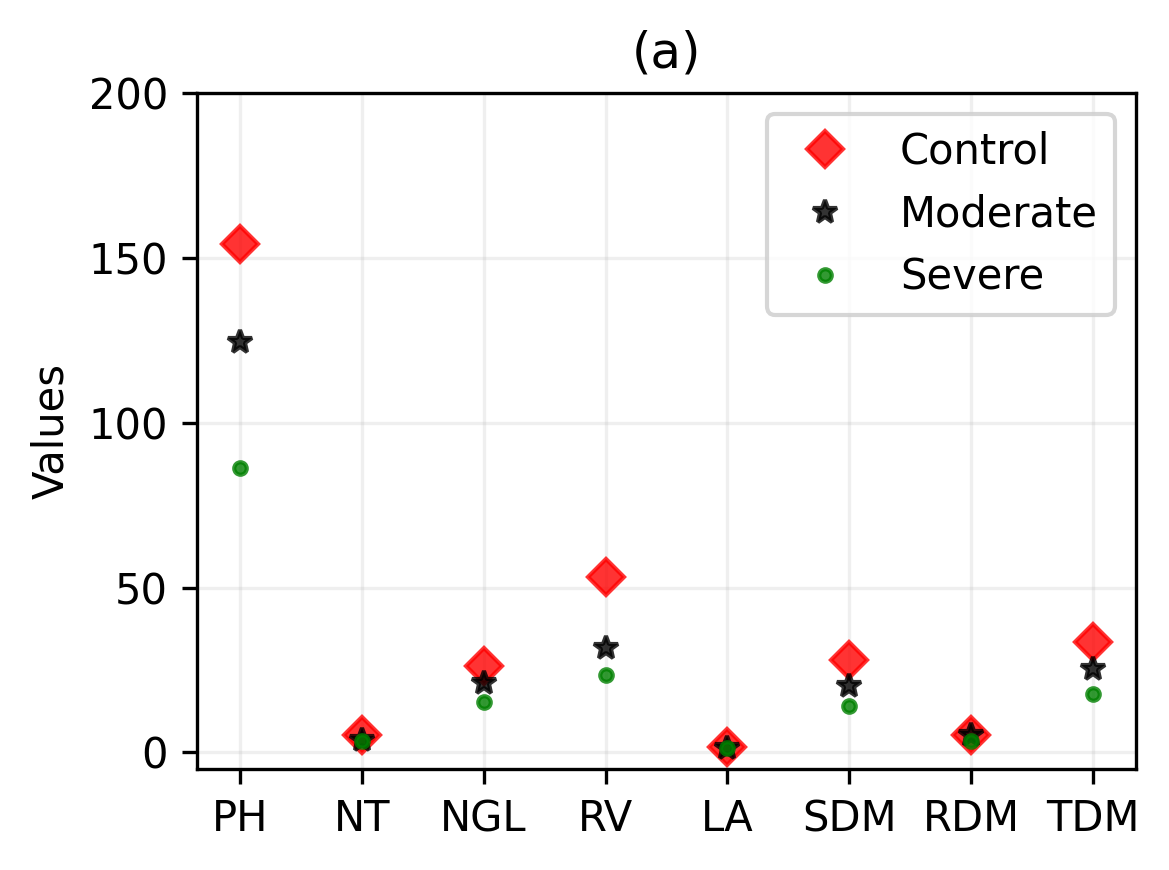


Variety:  BRS Piatã


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
2,13.963964,24.590164,16.991643,27.50,39.701123,34.998968,35.635030,35.265797,Control/Moderate
2,27.927928,36.065574,50.696379,56.25,55.027558,54.105582,64.803086,58.593204,Control/Severe


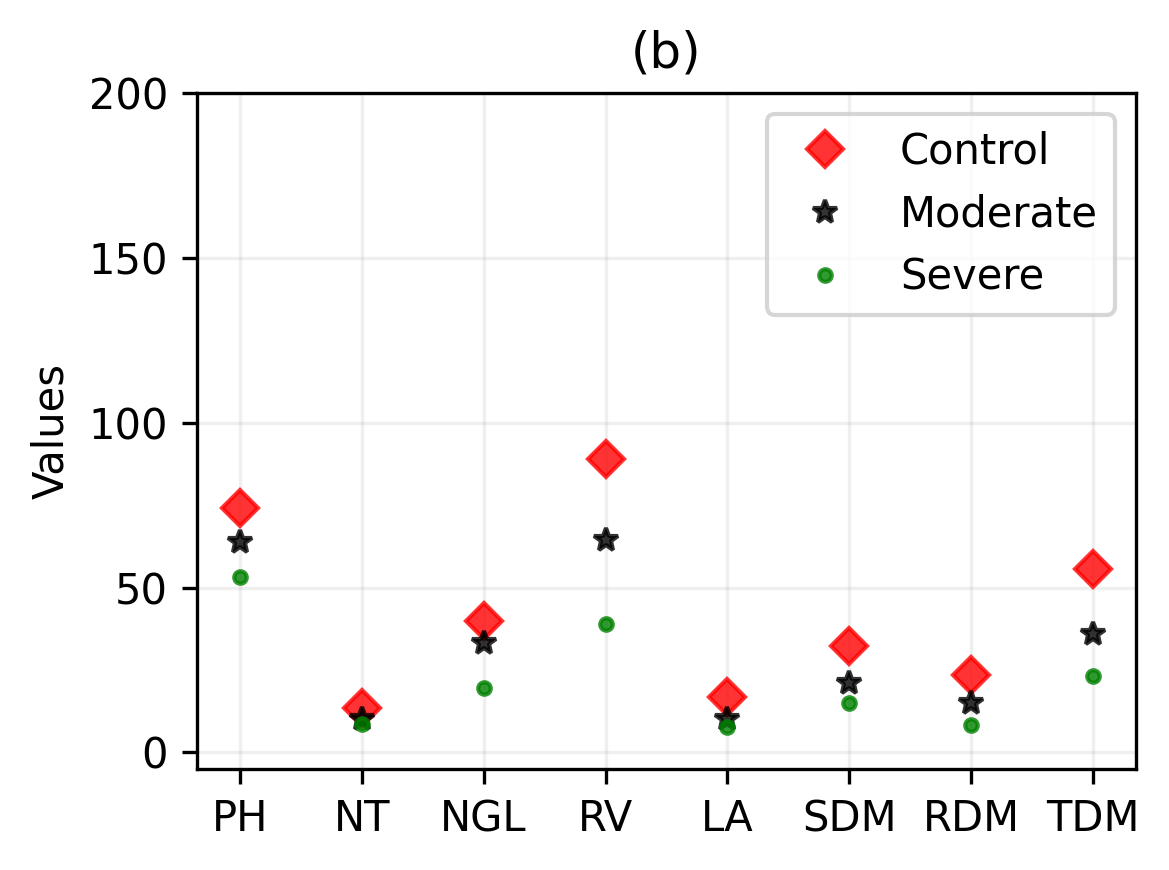


Variety:  Xaraés


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
8,9.677419,6.956522,28.395062,37.352246,29.501804,28.746967,12.859520,23.494434,Control/Moderate
8,18.279570,32.173913,49.074074,65.011820,57.889576,51.318776,37.326678,46.692862,Control/Severe


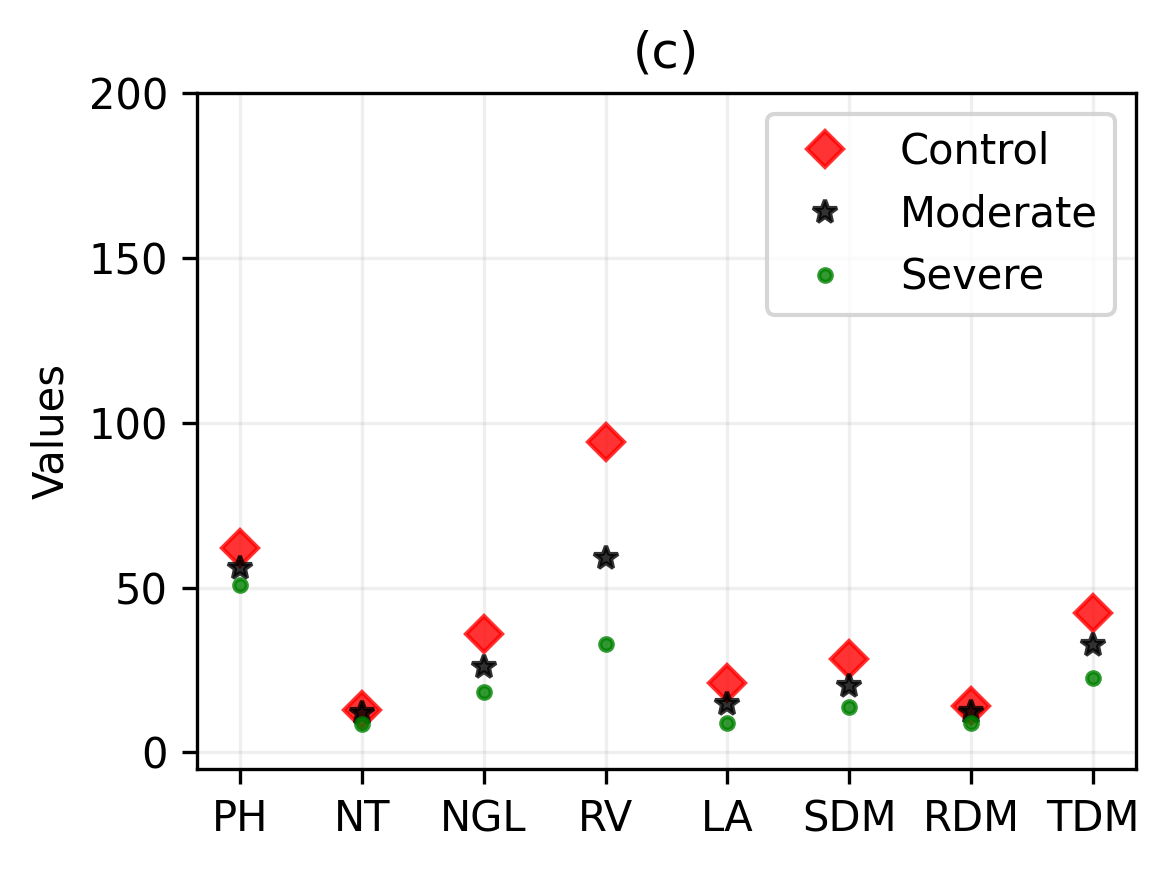


Variety:  Tanzânia


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
7,7.281553,-24.812030,38.115632,37.500000,9.412143,20.210725,28.361845,23.247691,Control/Moderate
7,7.281553,9.022556,38.115632,55.833333,44.769445,39.345809,41.459668,40.133396,Control/Severe


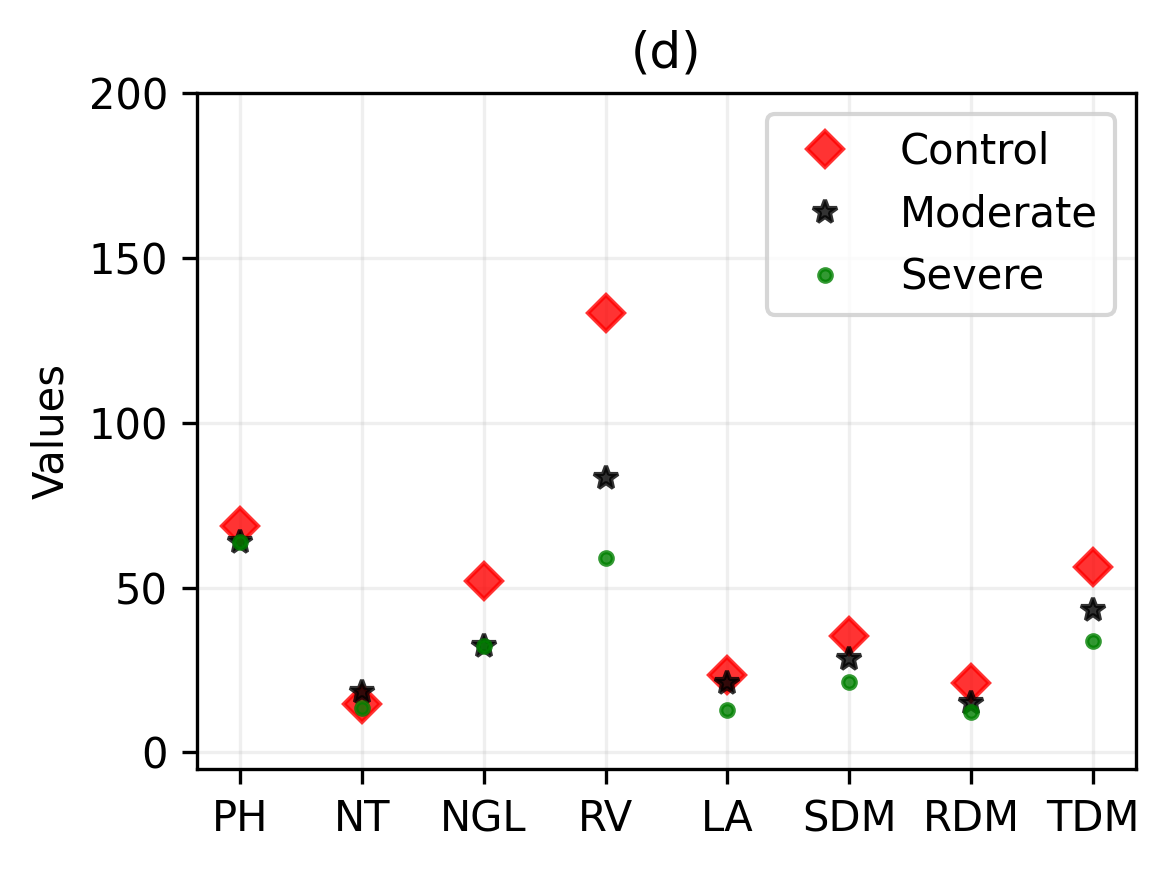

-------------------------------------------------------------------------------------------------------

Variety:  Comum


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
3,0.699301,-4.637097,26.558140,44.964029,40.255053,7.425500,36.889191,19.267749,Control/Moderate
3,9.090909,20.564516,57.488372,78.489209,62.294681,44.013854,69.125298,54.106818,Control/Severe


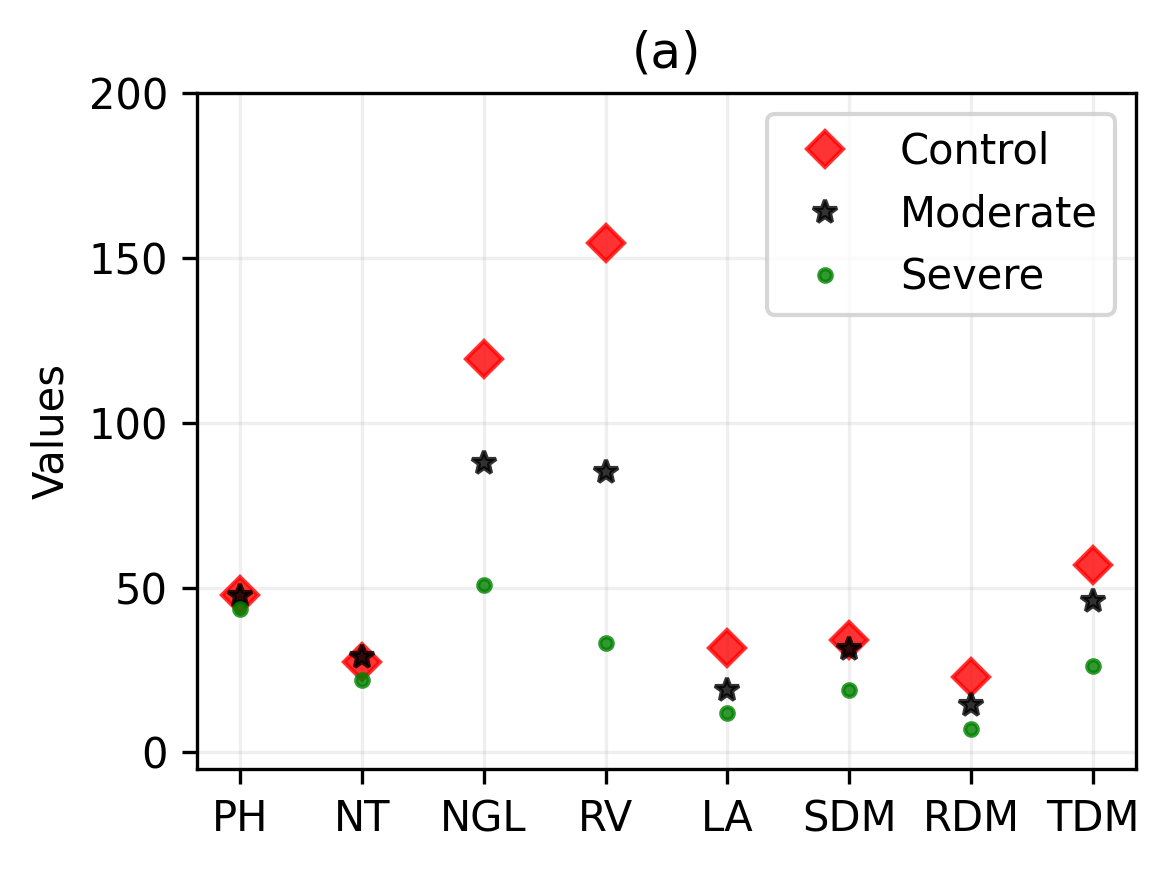


Variety:  Aruana


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
1,2.293578,-14.848485,37.102735,24.778761,41.165284,36.623772,52.709297,41.480192,Control/Moderate
1,1.834862,14.545455,49.593496,65.585054,58.661702,36.869081,92.841752,53.767926,Control/Severe


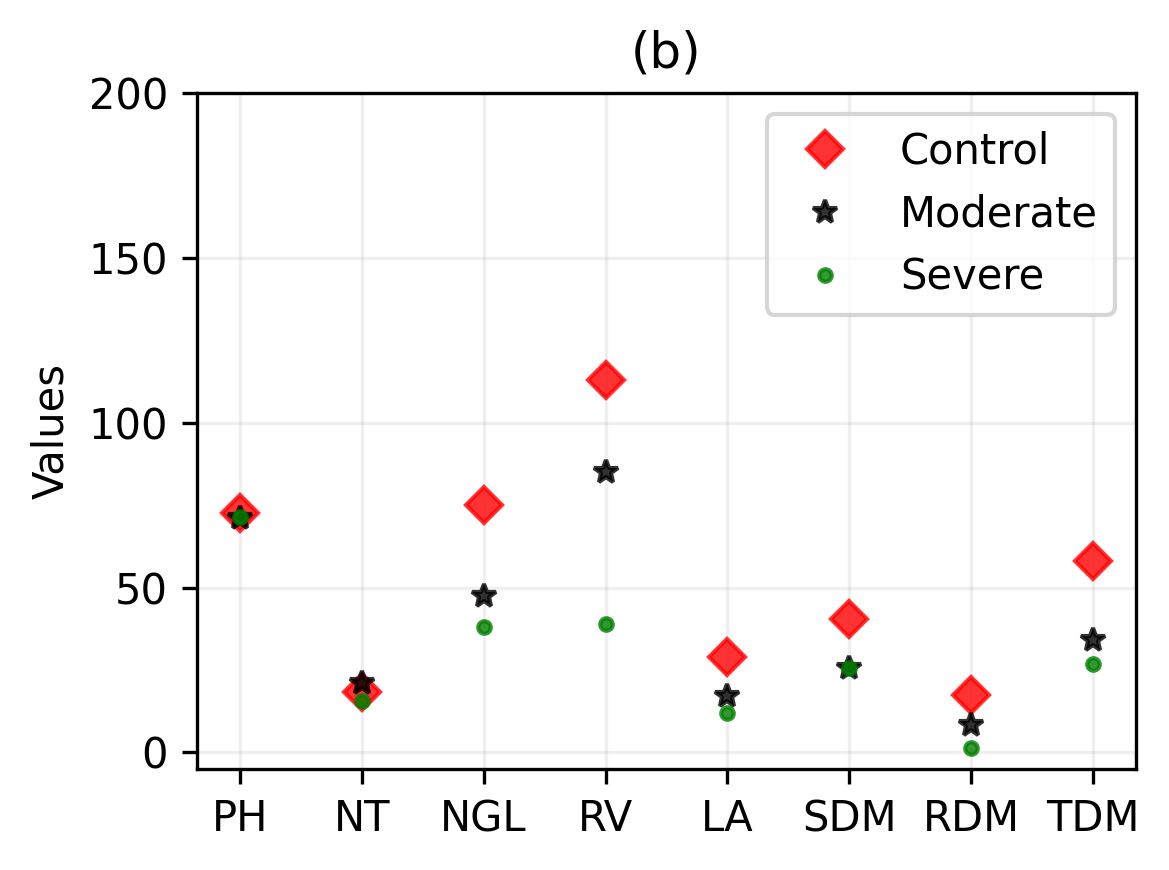


Variety:  Mombaça


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
5,21.338912,18.694362,40.131579,56.313993,34.502709,29.288300,53.841633,39.331245,Control/Moderate
5,22.175732,28.189911,55.263158,67.918089,58.064804,47.229265,70.806723,56.873052,Control/Severe


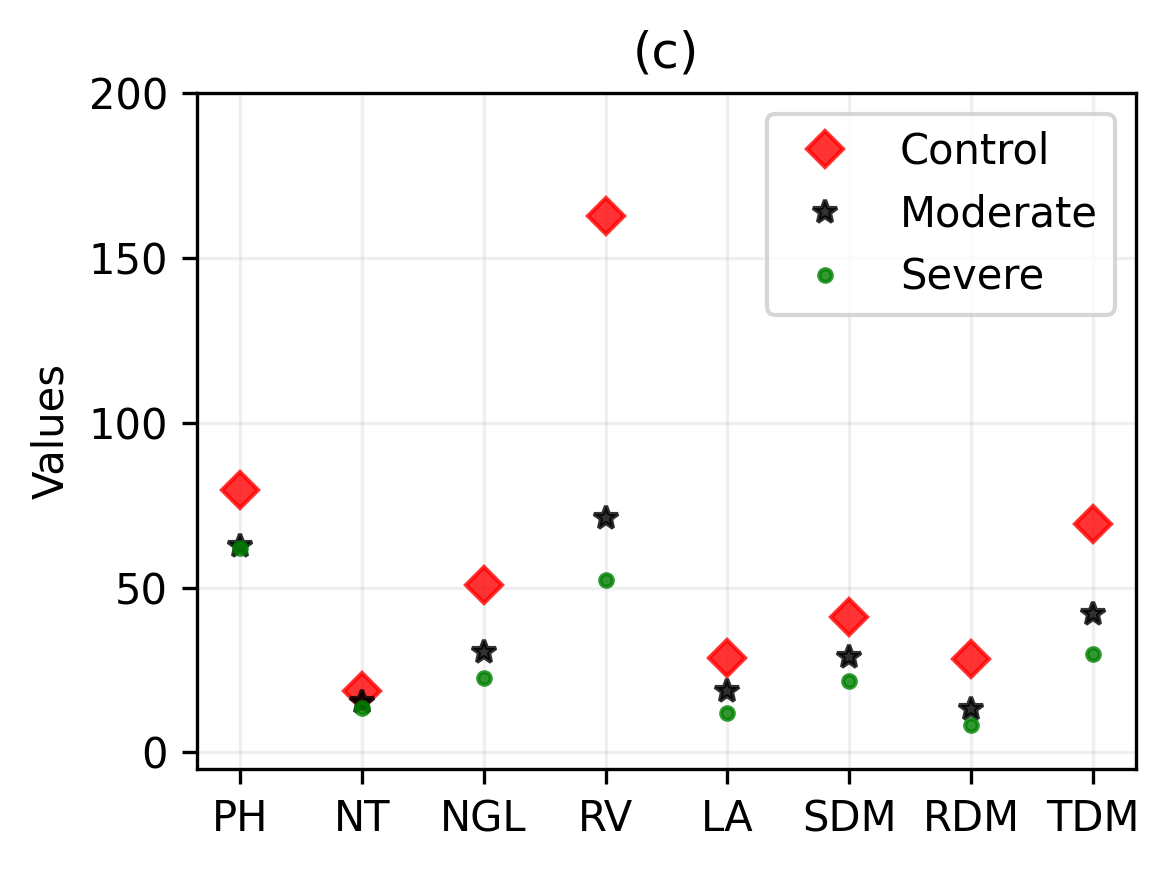


Variety:  Pojuca


,PH,NT,NGL,RV,LA,SDM,RDM,TDM,Comp
6,15.591398,19.225897,51.646228,65.714286,49.207978,47.658178,48.278873,47.785366,Control/Moderate
6,15.053763,17.733990,64.013644,67.241379,59.092964,52.393325,39.776307,49.807934,Control/Severe


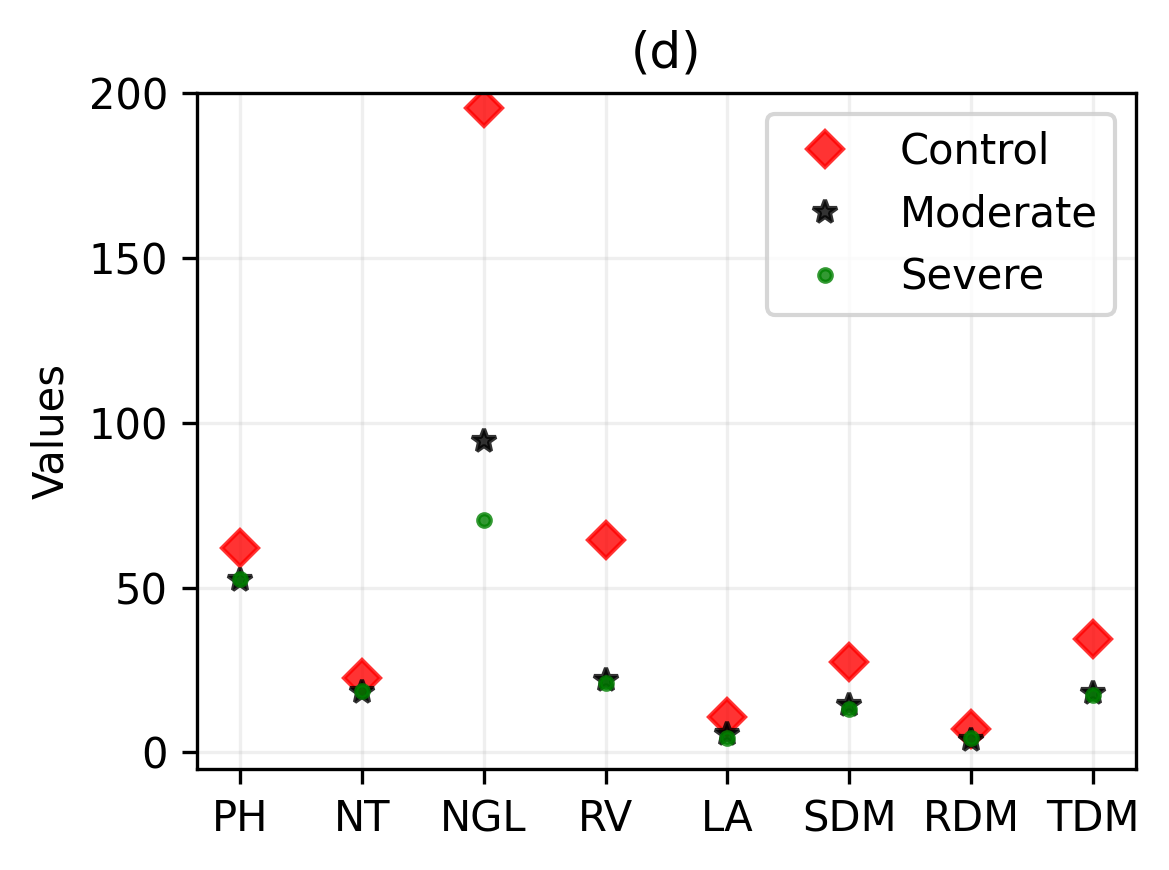

In [12]:
#Bar chart to compare the variables of the 4 best/worst varieties
best_var  = ['ADR 300', 'BRS Piatã', 'Xaraés', 'Tanzânia']
worst_var = ['Comum', 'Aruana', 'Mombaça', 'Pojuca']
letter    = ['a','b','c','d']

for list_gen in [best_var, worst_var]:
    print('-------------------------------------------------------------------------------------------------------')

    for i, gen in enumerate(list_gen):

        print('\nVariety: ', gen)

        #Select the original data (without standardization) to register
        df_sel_control = df_control_[df_control_['Variety'] == gen]
        df_sel_moderate  = df_moderate_[df_moderate_['Variety'] == gen]
        df_sel_severe = df_severe_[df_severe_['Variety'] == gen]

        del df_sel_control['Variety']
        del df_sel_moderate['Variety']
        del df_sel_severe['Variety']

        #Calculates percentage differences
        df_diff_control_moderate = df_sel_control.subtract(df_sel_moderate).div(df_sel_control).mul(100)
        df_diff_control_severe   = df_sel_control.subtract(df_sel_severe).div(df_sel_control).mul(100)

        '''print('Control/Moderate')
        print(df_diff_control_moderate)
        print('Control/Severe')
        print(df_diff_control_severe)'''

        df_diff_control_moderate['Comp'] = 'Control/Moderate'
        df_diff_control_severe['Comp']   = 'Control/Severe'

        df_diff = pd.concat([df_diff_control_moderate, df_diff_control_severe])
        display(df_diff)

        labels = list(df_sel_control.columns)

        fig, ax = plt.subplots(dpi=300, figsize=(4,3), sharex=True)
        ax.set_title('(' + letter[i] + ')')

        ax.plot(labels, np.array(df_sel_control)[0,:], label='Control', marker = "D", alpha=0.8, linestyle = 'None', markerfacecolor='r', markeredgecolor='r')

        ax.plot(labels, np.array(df_sel_moderate)[0,:], label='Moderate', marker = '*', alpha=0.8, linestyle = 'None', markerfacecolor='k', markeredgecolor='k')

        ax.plot(labels, np.array(df_sel_severe)[0,:], label='Severe', marker = '.', alpha=0.8, linestyle = 'None', markerfacecolor='g', markeredgecolor='g')

        ax.grid(alpha=0.2)
        ax.set_ylim((-5, 200))
        ax.legend()
        ax.set_ylabel('Values')

        plt.tight_layout()
        plt.show()
